# Выявление закономерностей успешности компьютерных игр  

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**  

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Краткий план работы**

1. Знакомство с вводными данными
2. Предобработка данных
3. Исследовательский анализ данных
4. Составление портрета пользователя каждого региона
5. Проверка гипотез
6. Общий вывод

### Шаг 1. Открытие файла с данными и изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from IPython.display import display
import seaborn as sns

Взглянем на таблицу предоставленных данных

In [2]:
df = pd.read_csv('/datasets/games.csv')
display(df, df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


None

В таблице собраны данные по 16715 играм. Есть следующие проблемы:

* Пропущенные значения в категориях Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating. В дальнейшем примим решение по логической замене пропусков исходя из корректности анализа.  

* В столбцах Year_of_Release, User_Score и Rating необходимо изменить тип данных на int64.    
* В целях удобства дальнейшей работы нужно будет переименовать столбцы датафрейма.

In [3]:
df['Year_of_Release'].describe()
# Посмотрим в какие года были выпущены игры

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: Year_of_Release, dtype: float64

В датасете присутствуют игры выпущенные с 1980 по 2016 год.

### Шаг 2. Подготовка данных

**2.1. Заменим названия столбцов**

In [4]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Так же приведем к нижнему регистру все значения в столбцах содержащих текст

In [5]:
list_to_lower = ['name','platform','genre','rating']
for column in list_to_lower:
    df[column] = df[column].str.lower()

**2.2. Обработаем пропуски и приведем данные в столбцах к нужным типам**

* Посмотрим на пропуски в столбце 'name' 

In [6]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Много данных в строчках пропущены, поэтому их можно удалить без ущерба дальнейшему анализу. Эти же две строчки относятся к пропущенным в столбце 'genre'.

In [7]:
df = df.dropna(subset=['name'])

* Посмотрим на пропуски в столбце 'year_of_release' 

In [8]:
# Воспользуемся функцией из предыдущих проектов
def pass_percent(category):
    print(f'В категории {category}: {df[category].isnull().sum()} пропусков.')
    print('Это {0:.1%} от всех данных в столбце.'.format(df[category].isnull().sum()/len(df)))
pass_percent("year_of_release")

В категории year_of_release: 269 пропусков.
Это 1.6% от всех данных в столбце.


Пропусков не так много и заполнить их не представляется возможным, поэтому так же удалим данные строки.

In [9]:
df = df.dropna(subset=['year_of_release'])
# Изменим тип данных в столбце на int
df['year_of_release'] = df['year_of_release'].astype('int')

* Посмотрим на пропуски в столбцах 'critic_score' и 'user_score' 

In [10]:
pass_percent("critic_score")

В категории critic_score: 8461 пропусков.
Это 51.5% от всех данных в столбце.


In [11]:
pass_percent("user_score")

В категории user_score: 6605 пропусков.
Это 40.2% от всех данных в столбце.


Пропусков в этих столбцах очень много, логической замены им нет и удалять их нельзя.  
Аббревиатура "tbd", в столбце оценки пользователей — скорее всего, сокращение от "to be determined". Никакой информационной нагрузки данное сокращение не несёт, и потому может быть превращено в "NaN". Для этого воспользуемся методом to_numeric.

In [12]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

Пропуски в столбцах 'critic_score' и 'user_score' заменим на -1, чтобы в дальнейшем можно было проводить корректный анализ.

In [13]:
df['critic_score'] = df['critic_score'].fillna(-1).astype('int')
df['user_score'] = df['user_score'].fillna(-1)

* Посмотрим на пропуски в столбце 'rating' 

In [14]:
pass_percent("rating")

В категории rating: 6676 пропусков.
Это 40.6% от всех данных в столбце.


Пропусков очень много, удалять их нельзя. Поэтому заменим все пропуски на 'unk', сокращение от 'unknown'.

In [15]:
df['rating'] = df['rating'].fillna('unk')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null int64
user_score         16444 non-null float64
rating             16444 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


* Проверим наличие дубликатов

In [16]:
df.duplicated().sum()

0

Дубликатов не обнаружено, это хорошо. Данные готовы для анализа.

**2.3. Посчитаем суммарные продажи во всех регионах**

In [17]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1,-1.0,unk,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1,-1.0,unk,31.38


### Шаг 3. Исследовательский анализ данных

**3.1. Посмотрим на периодичность выпуска игр по годам**

Text(0, 0.5, 'Количество игр')

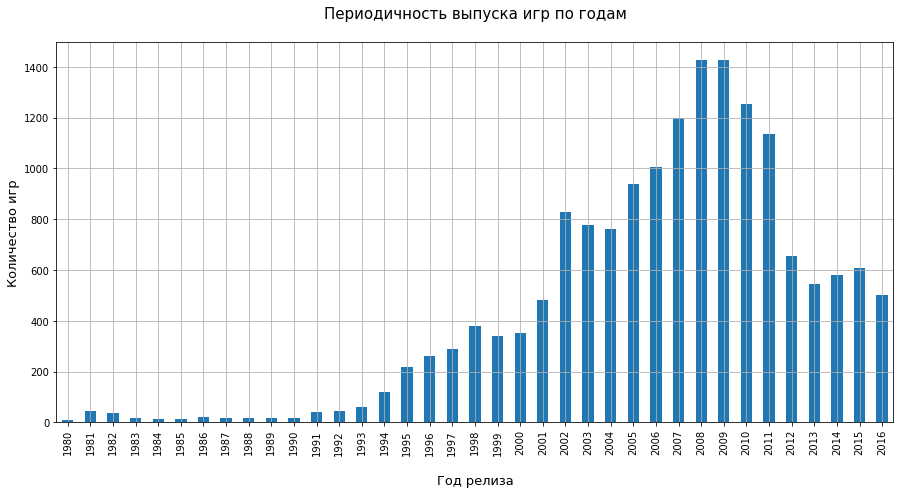

In [18]:
# Создадим сводную таблицу
games_per_year = df.pivot_table(index='year_of_release', aggfunc={'name':'count'})
games_per_year.columns = ['games_per_year']

# Построим график для наглядности
games_per_year.plot(y='games_per_year', kind='bar', figsize=(15, 7), legend=False, grid=True)
plt.title(label='Периодичность выпуска игр по годам\n', fontsize=15)
plt.xlabel("\nГод релиза", fontsize=13)
plt.ylabel("Количество игр", fontsize=13)

Из графика видно, что игр до 1995 года выходило очень мало. Затем был резкий рост, связанный с технологическим прорывом и появлением РС, который происходил вплоть до 2009 г. С 2010 по 2013 год наблюдается спад, возможно связанный с экономическим кризисом.  С 2013 по 2016 гг количество выпускаемых игр практически одинаковое. В последние годы игровые производители пытаются сделать более качественный продукт, не гонятся за количеством. Процесс создания игры затягивается на несколько лет.  
Для построения корректного прогноза нам не нужны данные за все года. Реальную ситуацию на рынке отражают последние года. Для анализа возьмем период с 2012 по 2016 гг.

**3.2. Посмотрим на продажи по платформам**

Сделаем сводную таблицу суммарных продаж по платформам. Отсортируем 10 платформ с наибольшими суммарными продажами.

In [19]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)

platform
ps2     1233.56
x360     961.24
ps3      931.34
wii      891.18
ds       802.78
ps       727.58
ps4      314.14
gba      312.88
psp      289.53
3ds      257.81
Name: total_sales, dtype: float64

Посмотрим распределение продаж по годам у наиболее популярных платформ

Text(0.5, 0, 'Год')

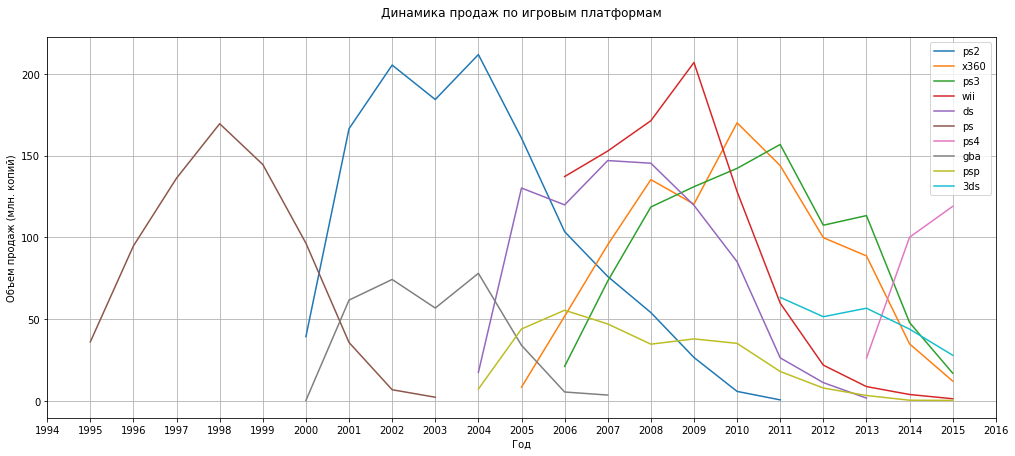

In [20]:
platforms_sales = df.pivot_table(index=("year_of_release", "platform"), values="total_sales", aggfunc="sum").reset_index()

# Возьмем года с 1995 по 2015. До 1995 г. продаж совсем не было, а данные за 2016 г. могут быть не полными.
platforms_sales = platforms_sales.query("1994 < year_of_release < 2016")

platforms_top_9 = pd.Series(["x360", "ps3", "wii", "ds", "ps", "ps4", "gba", "psp", "3ds"])
ax = platforms_sales.query('platform == "ps2"').plot(
    x="year_of_release", y="total_sales", figsize=(17, 7), label="ps2", grid=True)

for platform in platforms_top_9:
    platforms_sales.query("platform == @platform").plot(
        x="year_of_release", y="total_sales", figsize=(17, 7), label=platform, grid=True, ax=ax)

ax.set_xticks(np.arange(1994,2017))
plt.title("Динамика продаж по игровым платформам\n")
plt.ylabel("Объем продаж (млн. копий)")
plt.xlabel("Год")

По графику видно, что новые платформы появляются быстро, в течении 1 - 2 лет. А вот исчезают достаточно долго, в течении 5 и более лет. С выходом нового поколения игровой консоли, перестают делать игры на предыдущую модель и продажи падают.  
Ниже вычислим харрактерный срок жизни платформы.

In [21]:
# Создадим лист топ-10
list_platform = ["ps2", "x360", "ps3", "wii", "ds", "ps", "ps4", "gba", "psp", "3ds"]
platforms_top = df.query('platform in @list_platform')

# С помощью сводной таблицы вычислим разность между годами начала и окончания существования платформы
platform_lifetime = platforms_top.pivot_table(index='platform', values='year_of_release', aggfunc=[min, max])
platform_lifetime.columns = ['beginnig', 'end']
platform_lifetime['duration'] = platform_lifetime['end'] - platform_lifetime['beginnig']
display(platform_lifetime)

# Вычислим медианное значение
platform_lifetime['duration'].median()

,beginnig,end,duration
platform,,,
3ds,2011,2016,5
ds,1985,2013,28
gba,2000,2007,7
ps,1994,2003,9
ps2,2000,2011,11
ps3,2006,2016,10
ps4,2013,2016,3
psp,2004,2015,11
wii,2006,2016,10


10.0

**Средний срок жизни платформы из ТОП-10 составляет 10 лет.**

*Примечание:* Значение 28 лет у приставки Nintendo_DS не является правдивым. Согласно данным wikipedia, приставка вышла в 2004 году (это видно на нашей гистограмме выше). Игры для неё не могли продаваться ранее этого времени. 

**3.3. Определим потенциально прибыльные платформы**

Для дальнейшего анализа выберем данные за последние несколько лет, т.к. они отражают последние тенденции и на их основании можно делать различные предположения о будущем поведении.

**Актуальным периодом будем считать 2012 - 2016 года.**

In [22]:
# Сделаем срез данных согласно нашему периоду
period = (2012, 2016)
df_actual = df.query('@period[0] <= year_of_release <= @period[1]')
df_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97,8.2,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97,8.1,m,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1,-1.0,unk,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,-1,-1.0,unk,14.60
34,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83,5.3,m,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,-1,-1.0,unk,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,-1,-1.0,unk,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,-1,-1.0,unk,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,-1,-1.0,unk,0.01


Посмотрим на лидирующие по продажам платформы за выбранный период

In [23]:
actual_platform_sales = df_actual.pivot_table(
    index='platform', values='total_sales', aggfunc=sum).sort_values(by='total_sales', ascending=False)
actual_platform_sales

,total_sales
platform,
ps4,314.14
ps3,288.79
x360,236.54
3ds,194.61
xone,159.32
wiiu,82.19
pc,62.65
psv,49.18
wii,35.37


In [24]:
# Вспомним сколько было платформ в исходном датасете
len(df['platform'].unique())

31

В актуальном периоде, который мы выбрали, из 31 платформы остались только 11. Из этих 11 платформы DS и PSP можно исключить из потенциально прибыльных платформ, т.к. DS уже прекратила свое существование, а у PSP продажи практически равно нулю.  

Посмотрим на график динамики продаж для нашего актуального периода.

Text(0.5, 0, 'Год')

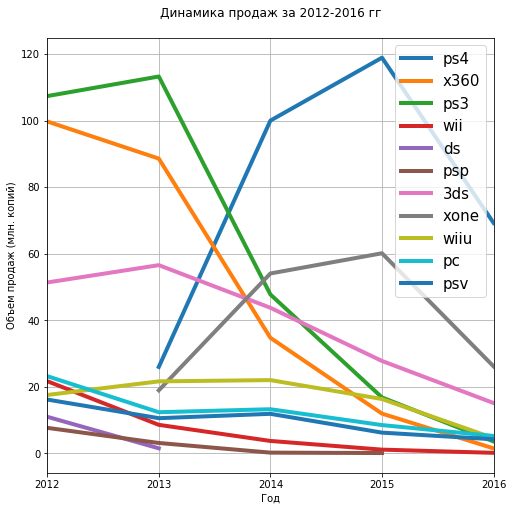

In [25]:
platforms_sales_actual = df_actual.pivot_table(
    index=("year_of_release", "platform"), values="total_sales", aggfunc="sum").reset_index()

platforms_top_10 = pd.Series(["x360", "ps3", "wii", "ds", "psp", "3ds", "xone", "wiiu", "pc", "psv"])
ax1 = platforms_sales_actual.query('platform == "ps4"').plot(
    x="year_of_release", y="total_sales", figsize=(8, 8), label="ps4", linewidth = 4, grid=True)

for platf in platforms_top_10:
    platforms_sales_actual.query("platform == @platf").plot(
        x="year_of_release", y="total_sales", figsize=(8, 8), label=platf, linewidth = 4, grid=True, ax=ax1)

ax1.set_xticks(np.arange(2012,2017))
ax1.legend(prop = {'size':15})
plt.title("Динамика продаж за 2012-2016 гг\n")
plt.ylabel("Объем продаж (млн. копий)")
plt.xlabel("Год")

График подтверждает предположения сделанные нами выше по поводу приставок DS и PSP. У DS продажи закончились ещё в 2013г, объемы продаж игр для PSP практически нулевые. Так же, к нулю стремятся продажи у Wii.  

На гистограмме видно, что продажи у всех платформ падают в 2016 г. Это ошибочное предположение, так как данные за 2016г. могут быть не полными (следует из условий проекта). 2016 г. будем брать в расчёт с осторожностью.  

Продажи стремительно падают у платформ-лидеров PS3 и X360. Им на смену приходят новые модели PS4 и XONE, продажи игр по ним только набирают обороты. Однозначно, обе модели (**PS4** и **XONE**) берём в список потенциально прибыльных.  
Так же в список потенциальных возьмем **3DS**, платформа появилась около 5 лет назад и продажи её игр до сих пор находятся на лидирующих позициях.  

Наш **ТОП-3** потенциально прибыльных платформ:  
1. PS4
2. XONE
3. 3DS

**3.4. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам**

(0, 2.5)

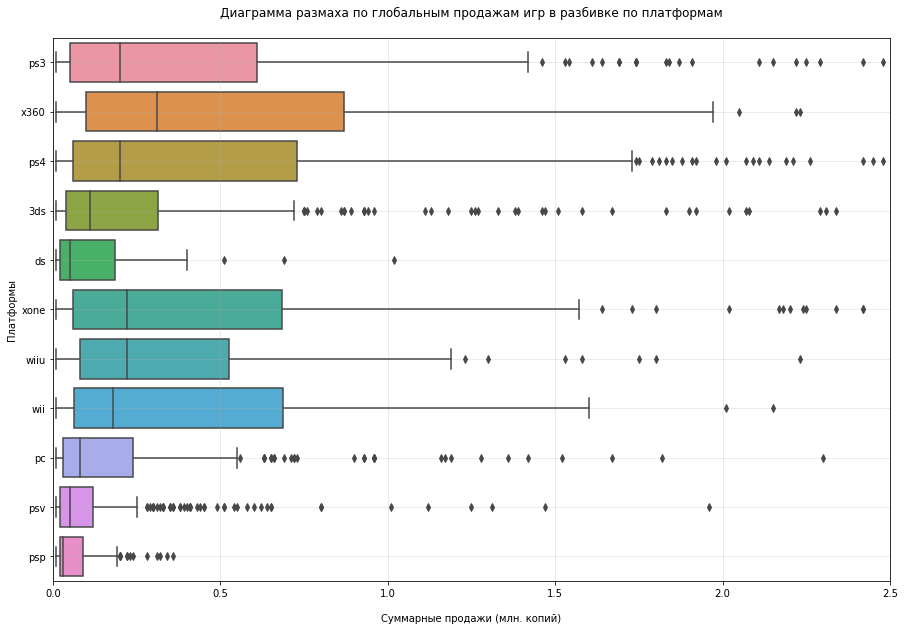

In [26]:
# используем библиотеку seaborn, для более наглядного построения диаграмм размаха

plt.figure(figsize=(15,10))
sns.boxplot(data=df_actual, x='total_sales', y='platform')

plt.title(label='Диаграмма размаха по глобальным продажам игр в разбивке по платформам\n')
plt.xlabel("\nСуммарные продажи (млн. копий)")
plt.ylabel("Платформы")
plt.grid(alpha=0.3)
plt.xlim(0, 2.5)

Продажи по платформам сильно скошены в большую сторону относительно средних значений. Это значит, что есть большой набор игр сильно выделяющихся объемами продаж.  

Почти у всех платформ есть много выбросов, скорее всего это игры-бестселлеры.

Медианные значения, в отличие от средних, гораздо более устойчивы к выбросам и довольно хорошо описывают выборку. Медианные значения выше всего на платформе X360, следовательно игры данной платформы самые востребованные за выбранный нами период. Далее идут консоли PS3, PS4, XONE, Wiiu и Wii - медианные значения у них практически одинаковые, это самые популярные модели судя по продажам.  
Игры для ПК менее востребованы, чем у приставок. Медианнное значение у PC на много ниже чем у популярных консолей.

**3.5. Рассмотрим влияние на продажи отзывов пользователей и критиков.**

Построим диаграмму рассеяния для самой популярной, за выбранный нами период, консоли X360

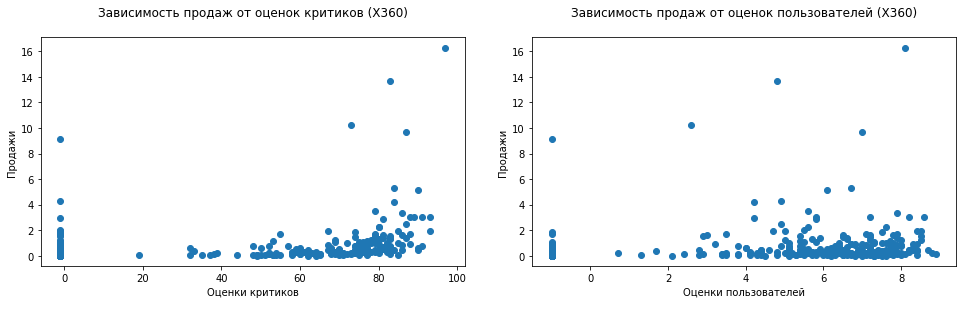

In [27]:
x_critic = df_actual[df_actual['platform']=='x360']['critic_score']
y_critic = df_actual[df_actual['platform']=='x360']['total_sales']
    
x_user = df_actual[df_actual['platform']=='x360']['user_score']
y_user = df_actual[df_actual['platform']=='x360']['total_sales']
    
    
fig = plt.figure(figsize=(13.5, 4.5))
    
ax1 = fig.add_subplot(121)
ax1.scatter(x_critic, y_critic)
ax1.set_title('Зависимость продаж от оценок критиков (X360)\n')
ax1.set_xlabel('Оценки критиков\n')
ax1.set_ylabel('Продажи')
    
ax2 = fig.add_subplot(122)
ax2.scatter(x_user, y_user)
ax2.set_title('Зависимость продаж от оценок пользователей (X360)\n')
ax2.set_xlabel('Оценки пользователей\n')
ax2.set_ylabel('Продажи')
    
plt.tight_layout(w_pad=3)

Исходя из диаграмм расеяния можно сказать, что объем продаж возрастает при оценке критиков выше 60, до этой отметки продажи малы.  
**Игры, у которых высокая оценка критиков как правило лучше продаются**. Зависимость продаж от оценок пользователей так же существует, продажи растут при оценке выше 4-5 баллов.

Посчитаем коэффициент корреляции Пирсона

In [28]:
df_actual[df_actual.platform == "x360"][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.260993,0.102670
critic_score,0.260993,1.000000,0.640383
user_score,0.102670,0.640383,1.000000


Коэффициент корреляции показывает, что зависимость продаж от оценок критиков (**0,26**) сильнее, чем от оценок пользователей (**0,1**). Корреляция положительная. Чем лучше отзыв критика, тем выше продажи. **Отзывы пользователей не так сильно вляют на продажи**. Корреляция слабая.

**3.6. Рассмотрим общее распределение игр по жанрам.**

Построим диаграмму количественного распределение игр по жанрам

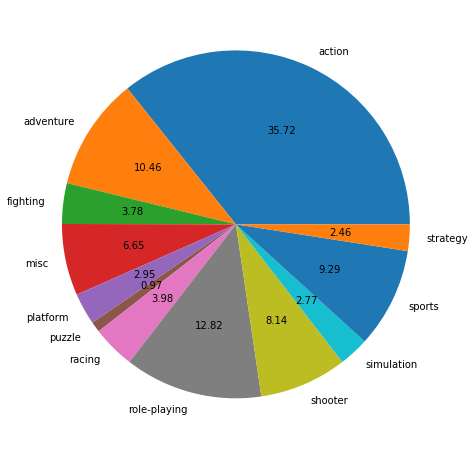

In [29]:
x=df_actual.groupby("genre")['genre'].count()
genres = x.index
plt.figure(figsize=(8,8))
plt.pie(x=x, labels=genres, autopct="%.2f")
plt.show()

Больше всего игр в жанре action. Затем идут ролевые игры (role-playing), приключения (adventure) и спорт (sports).  
Наименьшее количество игр в жанре puzzle.  

Построим гистограмму распределения продаж в зависимости от жанра игры

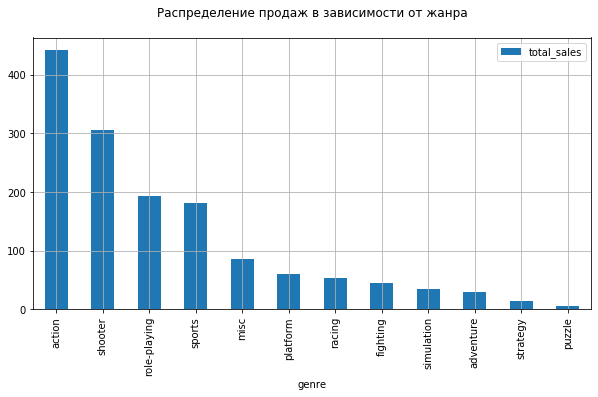

In [30]:
df_actual.pivot_table(index='genre', aggfunc={'total_sales':sum}).sort_values(
    by='total_sales', ascending=False).plot(
    y='total_sales', kind='bar', figsize=(10, 5) ,grid=True ,title='Распределение продаж в зависимости от жанра\n')

Больше всего покупают игры жанра Action, возможно, это связано с тем, что игр данного жанра выпускается больше всех остальных.  
На втором месте, неожиданно оказался Shooter. Игр данного жанра выпускают в 4 раза меньше чем Action, при этом он лидирует в продажах. **Shooter можно выделить как самый прибыльный жанр**, с низкой конкуренцией и высоким спросом продаж.  
Затем идут жанры Role-playing и Sports. Количество проданных копий у них практически одинаковое, при этом выпускается спортивных игр на четверть меньше. Sports так же можно отнести в список прибыльных жанров.  
Ещё один сюрприз, это жанр Adventure - он вошёл в тройку самых низких продаж. Игр данного жанра выпускается много, но продаётся он плохо. В список прибыльных он не попадает.  
Замыкае список жанр Puzzle. Здесь всё логично, таких игр выпускают совсем не много.

### Шаг 4. Портрет пользователя каждого региона  (NA, EA, JP)

**4.1. Самые популярные платформы (ТОП-5).**

Посчитаем суммарные продажи по платформам для каждого региона

In [31]:
platforms_per_region = (df_actual.pivot_table(index='platform', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum}))
platforms_per_region

,eu_sales,jp_sales,na_sales
platform,,,
3ds,42.64,87.79,55.31
ds,3.53,3.72,4.59
pc,37.76,0.00,19.12
ps3,106.86,35.29,103.38
ps4,141.09,15.96,108.74
psp,0.42,10.47,0.13
psv,11.36,21.04,10.98
wii,11.92,3.39,17.45
wiiu,25.13,13.01,38.10


Построим графики распределения продаж по платформам (ТОП-5)

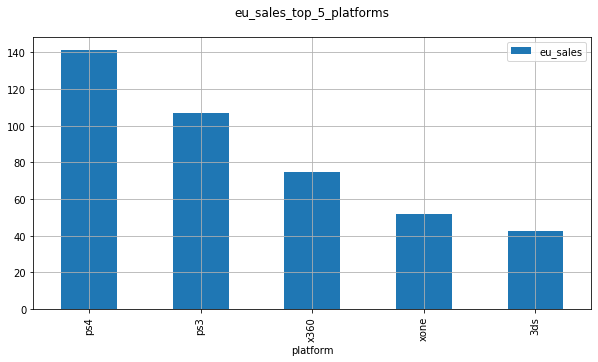

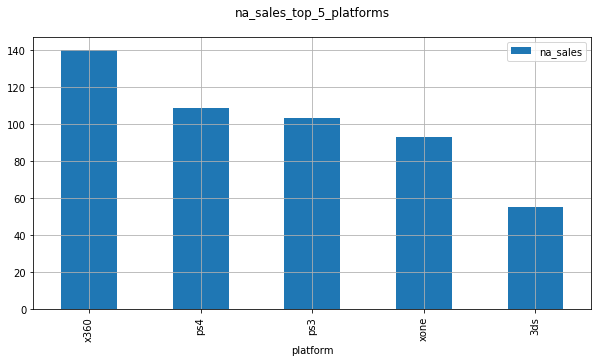

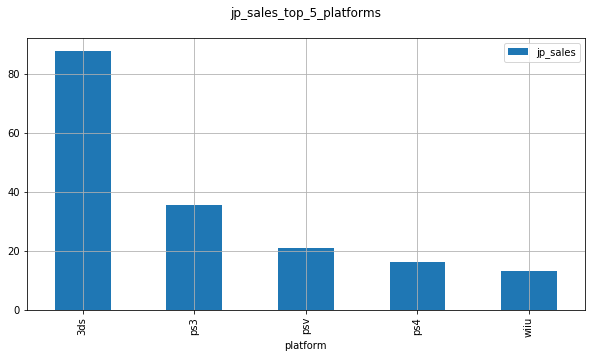

In [32]:
region = ['eu_sales', 'na_sales', 'jp_sales']

for i in range(0, 3):
    (platforms_per_region.nlargest(5, columns=region[i]).plot(
        y=region[i], kind='bar', figsize=(10, 5), grid=True, title=region[i]+'_top_5_platforms\n'))

В Европе самая популярная платформа Sony PlayStation 4, в Северной Америке Microsoft Xbox 360, в Японии - Nintendo 3DS.  
Американцы и японцы поддерживают своих производителей. Европейский рынок смотрит на общую популярность платформы, так как как нет крупных компаний по разработке платформ.

**4.2. Самые популярные жанры (ТОП-5).**

Посчитаем суммарные продажи по жанрам для каждого региона

In [33]:
genre_per_region = (df_actual.pivot_table(index='genre', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum}))   
genre_per_region

,eu_sales,jp_sales,na_sales
genre,,,
action,159.34,52.80,177.84
adventure,9.46,8.24,8.92
fighting,10.79,9.44,19.79
misc,26.32,12.86,38.19
platform,21.41,8.63,25.38
puzzle,1.40,2.14,1.13
racing,27.29,2.50,17.22
role-playing,48.53,65.44,64.00
shooter,113.47,9.23,144.77


Построим графики распределения продаж по жанрам (ТОП-5)

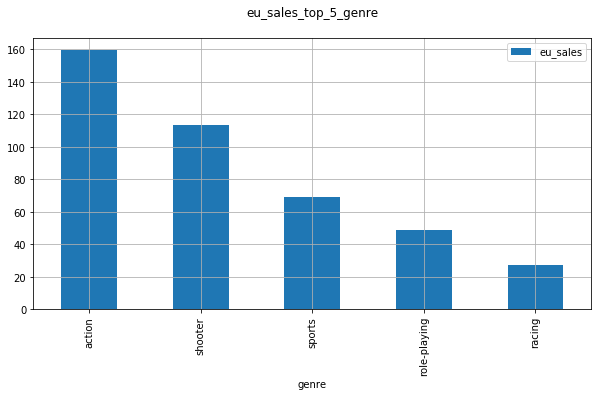

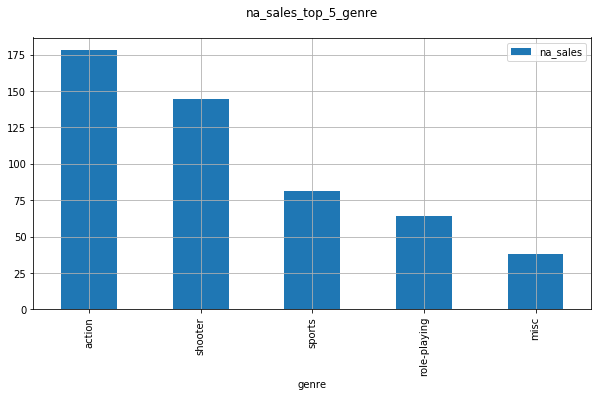

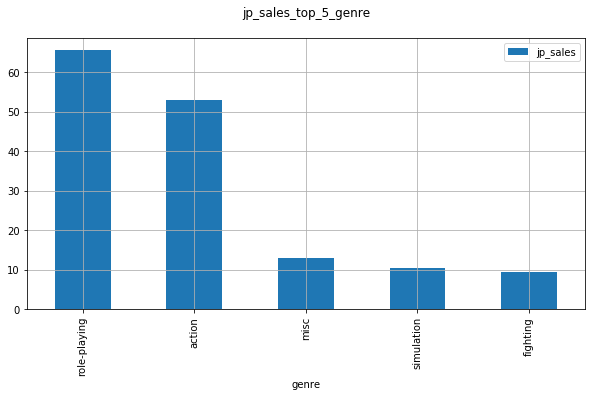

In [34]:
for i in range(0, 3):
    (genre_per_region.nlargest(5, columns=region[i]).plot(
        y=region[i], kind='bar', figsize=(10, 5), grid=True, title=region[i]+'_top_5_genre\n'))

В Америке и Европе самые популярные жанры практически совпадают. Отличаются лишь пятые места: в Европе это гонки, а в Северной Америке - аркады.  
В Японии вкусы сильно отличаются от Америки и Европы, на первом месте стоит жанр ролевые игры, жанра Shooter вообще нет. Жанры Role-playing и Action лидеры в продажах с большим отрывом от остальных жанров.

**4.3. Изучим влияние рейтинга ESRB на продажи.**

Построим сводную таблицу, аналогично предыдущим пунктам

In [35]:
rating_sum = df_actual.pivot_table(index='rating', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum})
rating_sum

,eu_sales,jp_sales,na_sales
rating,,,
e,113.03,28.33,114.37
e10+,55.37,8.19,75.70
m,193.96,21.20,231.57
t,52.96,26.02,66.02
unk,91.50,108.84,103.31


Описание значений возрастного рейтинга следующее:

- «E» («Everyone») — «Для всех»  
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»  
- «M» («Mature») — «Для взрослых»  
- «RP» («Rating Pending») — «Рейтинг ожидается» (Ранее мы заменили его на 'unk')

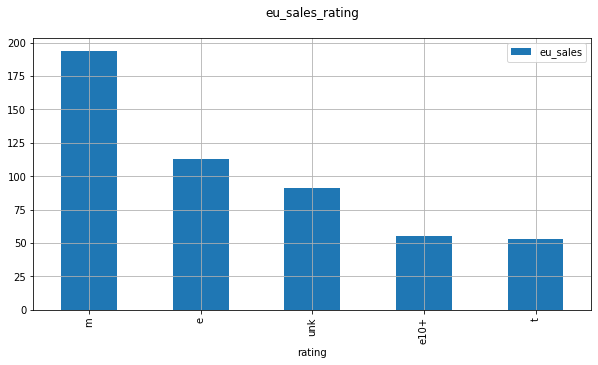

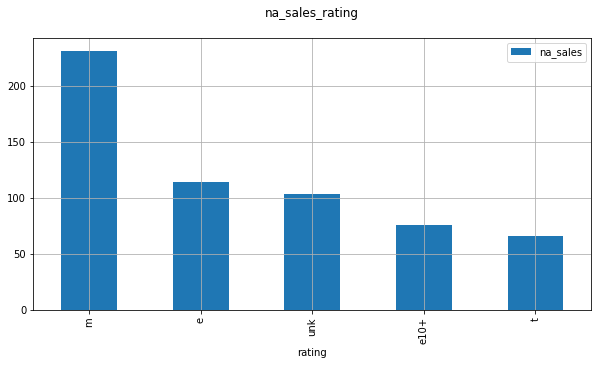

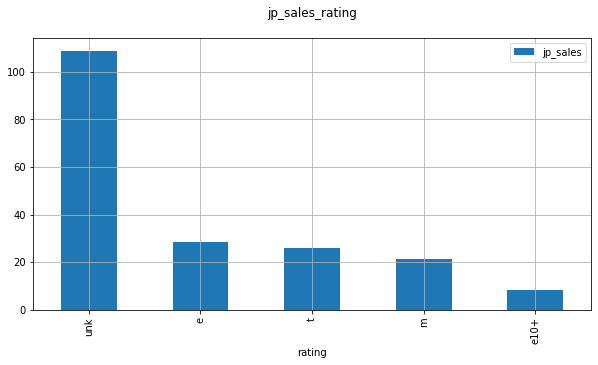

In [36]:
for i in range(0, 3):
    (rating_sum.sort_values(by=region[i], ascending=False)
     .plot(y=region[i], kind='bar', figsize=(10, 5), grid=True, title=region[i]+'_rating\n'))

В Америке и Европе схожие ситуации - в первую очередь популярны игры с возрастным рейтингом 17+. Это означает, что эти рынки ориентированы на взрослых пользователей.
В Японии большее количество игр продается без рейтинга. При этом из игр, рейтинг для которых проставлен, лидириуют игры для всех. Игры для взрослых на предпоследнем месте.

*Проведя анализ по регионам мы составили характерный портрет игрока:*

Американский игрок - старше 17 лет, играет на платформе Microsoft Xbox 360, любит экшены.  
Европейский игрок - так же, старше 17 лет, играет на платформе Sony PlayStation 4, тоже предпочитает экшены.  
Японский игрок - старше 13 лет, играет на платформе Nintendo 3DS, любит играть в ролевые игры.  

### Шаг 5. Проверка гипотез

**5.1. Первая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

Выдвинем нулевую гипотезу **H0**: Средние пользовательские рейтинги платформ Xbox One и PC **равны**.  
Альтернативная гипотеза **H1**: Средние пользовательские рейтинги платформ Xbox One и PC **не равны**.  

Сформируем выборки и проверим их дисперсии.

In [37]:
# Нужно удалить отрицательные значения, которыми ранее заменили пропуски
xbox_one_ttest = df_actual[(df_actual['platform']=='xone')&(df_actual['user_score'] >= 0)]['user_score']
pc_ttest = df_actual[(df_actual['platform']=='pc')&(df_actual['user_score'] >= 0)]['user_score']

xbox_one_ttest_var = np.var(xbox_one_ttest, ddof=1)
pc_ttest_var = np.var(pc_ttest, ddof=1)

print('Дисперсия Xbox One:', round(xbox_one_ttest_var, 2))
print('Дисперсия PC:', round(pc_ttest_var, 2))

Дисперсия Xbox One: 1.91
Дисперсия PC: 2.77


Для проверки гипотезы о равенстве средних двух выборок применим метод scipy.stats.ttest_ind.  
Дисперсии выборок не равны, поэтому зададим аргумент equal_var = False. Уровень значимости примем 5%.

In [38]:
alpha = 0.05

results = st.ttest_ind(xbox_one_ttest, pc_ttest, equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


*Вывод: Средние пользовательские рейтинги платформ Xbox One и PC **отличаются**.*

**5.2. Вторая гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.**

Выдвинем нулевую гипотезу **H0**: Средние пользовательские рейтинги жанров Action и Sports **равны**.  
Альтернативная гипотеза **H1**: Средние пользовательские рейтинги жанров Action и Sports **не равны**.  

Сформируем выборки и проверим их дисперсии.

In [39]:
# Нужно удалить отрицательные значения, которыми ранее заменили пропуски
action_ttest = df_actual[(df_actual['genre']=='action')&(df_actual['user_score'] >= 0)]['user_score']
sports_ttest = df_actual[(df_actual['genre']=='sports')&(df_actual['user_score'] >= 0)]['user_score']

action_ttest_var = np.var(action_ttest, ddof=1)
sports_ttest_var = np.var(sports_ttest, ddof=1)

print('Дисперсия жанра Action:', round(action_ttest_var, 2))
print('Дисперсия жанра Sports:', round(sports_ttest_var, 2))

Дисперсия жанра Action: 1.89
Дисперсия жанра Sports: 3.02


Для проверки гипотезы о равенстве средних двух выборок применим метод scipy.stats.ttest_ind.  
Дисперсии выборок не равны, поэтому зададим аргумент equal_var = False. Уровень значимости примем 5%.

In [40]:
alpha = 0.05

results = st.ttest_ind(action_ttest, sports_ttest, equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.24307776572644e-20
Отвергаем нулевую гипотезу


*Вывод: Средние пользовательские рейтинги жанров Action и Sports **отличаются**.*

### Шаг 6. Общий вывод.

В ходе исследования мы обработали и проанализировали предоставленные нам исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Для анализа был выбран период с 2012 по 2016 год, который отражает реальную ситуацию на рынке за последнее время.  

В процессе исследовательского анализа мы установили **средний срок жизни топовых платформ, он составляет 10 лет**. Платформы быстро набирают популярность в течении первого - второго года после выхода. После этого идёт период активных продаж игр. Затем консоль уходит с рынка. Это более плавный процесс, который растягивается на 5 и более лет.  

Для определения потенциально популярного продукта нужно однозначно ориентироваться на **топовые платформы, которые появились в течении последних нескольких лет**. Мы выявили, что такими платформами являются: **Sony PlayStation 4, Microsoft Xbox One и Nintendo 3DS**. Данные консоли являются новыми версиями уже известных моделей мировых производителей, вышли на рынок совсем недавно, но игры к ним уже хорошо продаются. Исходя из рассчитаного нами среднего срока жизни платформы, они будут актуальны ещё долго.  

Следующим этапом определения потенциально успешной игры мы рассмотрели влияние отзывов и критиков. Здесь ситуация следющая:  **игры у которых высокая оценка критиков (60 и болеее) продаются лучше**. Нужно учитывать этот фактор. Зависимость продаж от оценок пользователей так же существует, но она менее выражена.  

В разрезе жанров видеоигр также есть свои особенности. Например жанр Action является самым популярным во всех регионах, при этом игр данного жанра выпускается огромное количество, конкуренция здесь очень серъёзная. **Выбирая потенциально прибыльный продукт я бы обратил внимание на жанр Shooter**. Данный жанр занимает вторую строчку по общему количеству мировых продаж, при этом имеет низкую конкуренцию (таких игр выходит на много меньше). А вот с жанром Adventure стоит быть аккуратным: игр выпускается много, но продаются они плохо.

Далее мы попытались составить характерный портрет игрока для разных регионов. В целом **пользователи из регионов Европа и Северная Америка очень схожи в своих предпочтених** и можно объеденить усилия и рекламный контент для этих направлений. В обоих регионах полулярные жанры: Action, Shooter, Sports. В обоих регионах лидируют игры с возрастным ограничением 17+. Есть различия в любимой консоли: в Америке играют на Microsoft Xbox 360, а в Европе на Sony PlayStation 4.  
**Японская аудитория отличается кардинально**. Играют здесь на Nintendo 3DS, а любимые жанры Role-playing и Action. Абсолютное большинство игр в Японии продается без рейтинга.  
Описанная выше информация пригодится для выбора потенциального продукта для конкретного региона и выстраивания рекламной кампании в нём соответственно.